<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_RA_2024/blob/main/NYT_Sentiment_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the text from NYT

In [93]:
# https://pynytimes.michadenheijer.com/popular/top-stories
! pip install pynytimes

In [94]:
from pynytimes import NYTAPI
import datetime

mykey = "Q8HeG5RdeGU13bOizSXyO1bRsY2sKmR5"

nyt = NYTAPI(mykey, parse_dates=True)

# By Year

In [109]:
import datetime
import pandas as pd


# Initialize empty lists to store data
df_authors = []
df_headlines = []
df_abstracts = []
df_urls = []
df_years = []

# Loop through the years from 2017 to 2023
for year in range(2009, 2024):
    articles = nyt.article_search(
        query="diversity inclusion equity",
        results=10,
        dates={"begin": datetime.datetime(year, 1, 1), "end": datetime.datetime(year, 12, 31)},
        options={"sort": "newest"}
    )

    for a_article in articles:
        # Extracting data from the article
        abstract = a_article.get("abstract", "")
        paragraph = a_article.get("lead_paragraph", "")
        author = str(a_article.get("byline", {}).get("original", "")).replace("By ", "")
        headline = a_article.get("headline", {}).get("main", "")
        url = a_article.get("web_url", "")

        # Appending data to lists
        df_authors.append(author)
        df_headlines.append(headline)
        df_abstracts.append(abstract)
        df_urls.append(url)
        df_years.append(year)

# Creating a DataFrame
df_all_years = pd.DataFrame({
    "Author": df_authors,
    "Headline": df_headlines,
    "Abstract": df_abstracts,
    "URL": df_urls,
    "Year": df_years
})




In [110]:
df_all_years["Year"].value_counts()


2016    10
2017    10
2018    10
2019    10
2020    10
2021    10
2022    10
2023    10
2015     5
2012     2
2013     2
2014     2
2010     1
2011     1
Name: Year, dtype: int64

# Sentiment

In [111]:
! pip install vaderSentiment

In [112]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# empty list
sentiment_scores = []
positive_sentiments = []
negative_sentiments = []
neutral_sentiments = []

# Iteraate and get score
for index, row in df_all_years.iterrows():
    year = row["Year"]
    url = row["URL"]
    text = row["Abstract"]
    vs = analyzer.polarity_scores(text)
    sentiment_scores.append(vs["compound"])
    positive_sentiments.append(vs["pos"])
    negative_sentiments.append(vs["neg"])
    neutral_sentiments.append(vs["neu"])

    print(year, url, vs)

df_all_years["vader_Sentiment"] = sentiment_scores

df_all_years

2010 https://www.nytimes.com/2010/11/15/business/media/15adnewsletter3.html {'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.5994}
2011 https://www.nytimes.com/2011/09/27/us/campus-diversity-bake-sale-is-priced-by-race-and-sex.html {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2012 https://dotearth.blogs.nytimes.com/2012/03/29/scientists-call-for-practical-steps-to-smooth-humanitys-journey/ {'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4939}
2012 https://dealbook.nytimes.com/2012/01/05/morning-take-out-396/ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
2013 https://www.nytimes.com/2013/10/24/opinion/kristof-twitter-women-power.html {'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.6908}
2013 https://www.nytimes.com/2013/05/28/us/texas-firm-highlights-struggle-for-black-professionals.html {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7506}
2014 https://www.nytimes.com/2014/06/28/business/john-browne-former-chief-of-bp-on-being-a-closeted-exe

,Author,Headline,Abstract,URL,Year,vader_Sentiment
0,The New York Times,Accounts and People of Note in the Ad Industry,"Buffalo Wild Wings, Minneapolis, named BFG Com...",https://www.nytimes.com/2010/11/15/business/me...,2010,0.5994
1,Malia Wollan,A ‘Diversity Bake Sale’ Backfires on Campus,Berkeley College Republicans said a bake sale ...,https://www.nytimes.com/2011/09/27/us/campus-d...,2011,0.0000
2,Andrew C. Revkin,Scientists Call for Practical Steps to Smooth ...,Scientists gauging global environmental trends...,https://dotearth.blogs.nytimes.com/2012/03/29/...,2012,-0.4939
3,William Alden,Morning Take-Out,Highlights from the DealBook newsletter.,https://dealbook.nytimes.com/2012/01/05/mornin...,2012,0.0000
4,Nicholas Kristof,"Twitter, Women and Power","Research suggests that, in order to succeed, c...",https://www.nytimes.com/2013/10/24/opinion/kri...,2013,0.6908
...,...,...,...,...,...,...
88,Karoun Demirjian,"House Passes Defense Bill, Clearing It for Biden",Republicans and Democrats banded together to p...,https://www.nytimes.com/2023/12/14/us/politics...,2023,0.4939
89,David W. Chen and Michael Corkery,A New Playbook for College Donors: Power Politics,Donations to U.S. universities reached $59.5 b...,https://www.nytimes.com/2023/12/13/us/universi...,2023,0.4404
90,David French,What the University Presidents Got Right and W...,The proper response to censorship is not more ...,https://www.nytimes.com/2023/12/10/opinion/ant...,2023,0.0000
91,Nicholas Confessore,"As Fury Erupts Over Campus Antisemitism, Conse...",Republicans have been attacking elite universi...,https://www.nytimes.com/2023/12/10/us/universi...,2023,-0.6597


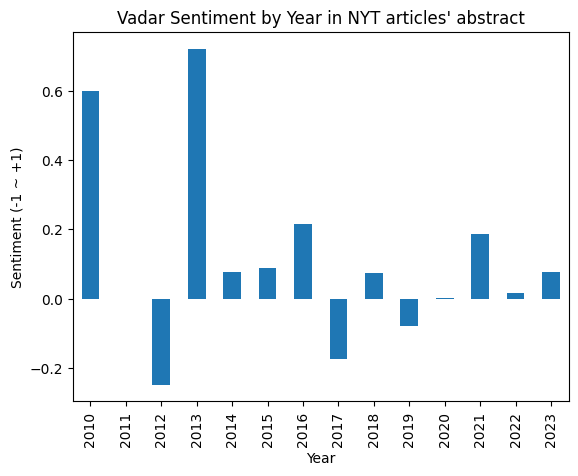

In [115]:
import matplotlib.pyplot as plt

result = df_all_years.groupby("Year")["vader_Sentiment"].mean()

# Plotting the bar graph
result.plot(kind='bar')

plt.title("Vadar Sentiment by Year in NYT articles' abstract")
plt.ylabel("Sentiment (-1 ~ +1)")
plt.show()

# NRC 8 Emotion Sentiment Dictionary

In [116]:
! pip install NRCLex

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
from nrclex import NRCLex

df_fear = []
df_anger = []
df_anticipation = []
df_trust = []
df_surprise = []
df_sadness = []
df_disgust = []
df_disgust = []
df_joy = []


for index, row in df_all_years.iterrows():
    url = row["URL"]
    text = row["Abstract"]

    emotion = NRCLex(text)
    emotions = emotion.affect_frequencies

    fear = emotions["fear"]
    anger = emotions["anger"]
    anticipation = emotions["anticip"]
    trust = emotions["trust"]
    surprise = emotions["surprise"]
    sadness = emotions["sadness"]
    disgust = emotions["disgust"]
    joy = emotions["joy"]

    df_fear.append(fear)
    df_anger.append(anger)
    df_anticipation.append(anticipation)
    df_trust.append(trust)
    df_surprise.append(surprise)
    df_sadness.append(sadness)
    df_disgust.append(disgust)
    df_joy.append(joy)


    #print(emotions)

df_all_years["Fear"] = df_fear
df_all_years["Anger"] = df_anger
df_all_years["Anticipation"] = df_anticipation
df_all_years["Trust"] = df_trust
df_all_years["Surprise"] = df_surprise
df_all_years["Sadness"] = df_sadness
df_all_years["Disgust"] = df_disgust
df_all_years["Joy"] = df_joy

In [119]:
df_all_years.head(3)

,Author,Headline,Abstract,URL,Year,vader_Sentiment,Fear,Anger,Anticipation,Trust,Surprise,Sadness,Disgust,Joy
0,The New York Times,Accounts and People of Note in the Ad Industry,"Buffalo Wild Wings, Minneapolis, named BFG Com...",https://www.nytimes.com/2010/11/15/business/me...,2010,0.5994,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857
1,Malia Wollan,A ‘Diversity Bake Sale’ Backfires on Campus,Berkeley College Republicans said a bake sale ...,https://www.nytimes.com/2011/09/27/us/campus-d...,2011,0.0000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667
2,Andrew C. Revkin,Scientists Call for Practical Steps to Smooth ...,Scientists gauging global environmental trends...,https://dotearth.blogs.nytimes.com/2012/03/29/...,2012,-0.4939,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000


In [120]:
df_all_years.groupby("Year")["Fear", "Anger", "Anticipation", "Trust", "Surprise", "Sadness","Disgust", "Joy"].mean()


<ipython-input-120-2e0df2fc6013>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_all_years.groupby("Year")["Fear", "Anger", "Anticipation", "Trust", "Surprise", "Sadness","Disgust", "Joy"].mean()


,Fear,Anger,Anticipation,Trust,Surprise,Sadness,Disgust,Joy
Year,,,,,,,,
2010,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857
2011,0.000000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.166667
2012,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000
2013,0.055556,0.000000,0.0,0.083333,0.083333,0.055556,0.000000,0.138889
2014,0.000000,0.000000,0.0,0.083333,0.000000,0.083333,0.000000,0.083333
2015,0.028571,0.061905,0.0,0.422222,0.033333,0.028571,0.000000,0.055556
2016,0.033333,0.100000,0.0,0.147222,0.011111,0.000000,0.000000,0.061111
2017,0.044444,0.033333,0.0,0.108889,0.036667,0.053333,0.033333,0.027778
2018,0.159167,0.039167,0.0,0.127024,0.039167,0.070000,0.006667,0.050833


<ipython-input-123-d2e48994a8e3>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_means_by_year = df_all_years.groupby("Year")["Fear", "Anger", "Anticipation", "Trust", "Surprise", "Sadness", "Disgust", "Joy"].mean()


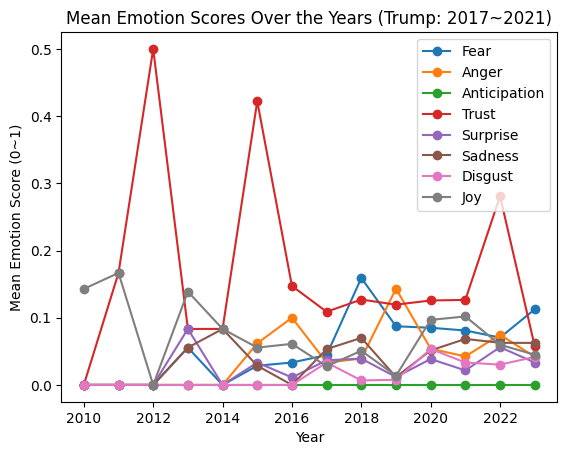

In [123]:
# Assuming df_all_years contains the emotion columns

# Group by "Year" and calculate the mean for each emotion
df_means_by_year = df_all_years.groupby("Year")["Fear", "Anger", "Anticipation", "Trust", "Surprise", "Sadness", "Disgust", "Joy"].mean()

# Plotting the line graphs for each emotion
df_means_by_year.plot(kind='line', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Emotion Score (0~1)')
plt.title('Mean Emotion Scores Over the Years (Trump: 2017~2021)')

# Show the plot
plt.show()


In [124]:
df_all_years.to_csv("NYT Sentiment.csv", index=False)

# Trials

In [72]:
# https://developer.nytimes.com/docs/articlesearch-product/1/types/Article

articles = nyt.article_search(query = "diversity inclusion equity", # Search for articles
    results = 10, # Return n articles
    # Search for articles in datetime (do not include 0)
    dates = {
        "begin": datetime.datetime(2017, 1, 1),
        "end": datetime.datetime(2017, 12, 31)},
    options =
        {"sort": "newest"} # Sort by
)


In [73]:
df_authors = []
df_headlines = []
df_abstracts = []
df_urls = []

for a_article in articles:
  abstract = a_article["abstract"]

  paragraph = a_article["lead_paragraph"]

  author = a_article["byline"]["original"]
  author = str(author)
  author = author.replace("By ", "")

  headline = a_article["headline"]["main"]

  url = a_article["web_url"]

  df_authors.append(author)
  df_headlines.append(headline)
  df_abstracts.append(abstract)
  df_urls.append(url)


In [74]:
import pandas as pd

df_2017 = pd.DataFrame({
    "Author":df_authors,
    "Headline":df_headlines,
    "Abstract":df_abstracts,
    "URL":df_urls
})

df_2017["Year"] = 2017

df_2017

,Author,Headline,Abstract,URL,Year
0,David W. Chen,WNYC Chief Pushed Growth at the Cost of Statio...,The New York Public Radio head Laura Walker an...,https://www.nytimes.com/2017/12/22/nyregion/wn...,2017
1,Matthew Schneier,The Year in Stuff,"What a long, strange year it has been. Here ar...",https://www.nytimes.com/2017/12/13/fashion/the...,2017
2,None,DealBook Briefing: U.S. Sues to Block AT&T-Tim...,The Justice Department plans to file a lawsuit...,https://www.nytimes.com/2017/11/20/business/de...,2017
3,Alina Tugend,Successful Career Women Finish the Phrase ‘If ...,Women attending the Women’s Forum for the Econ...,https://www.nytimes.com/2017/10/10/business/su...,2017
4,Iris Bohnet,Tackling ‘the Thin File’ That Can Prevent a Pr...,Evidence points to a promotion gap between whi...,https://www.nytimes.com/2017/10/03/business/wo...,2017
5,Jessica Bennett,Ellen Pao Is Not Done Fighting,"With her new book, “Reset,” a thwarted Silicon...",https://www.nytimes.com/2017/09/08/style/ellen...,2017
6,Robin Pogrebin,"It’s a Diverse City, but Most Big Museum Board...",A Times survey of New York City museums reveal...,https://www.nytimes.com/2017/08/22/arts/design...,2017
7,Robin Pogrebin,"De Blasio, With ‘Cultural Plan,’ Proposes Link...",The Metropolitan Museum of Art and other major...,https://www.nytimes.com/2017/07/19/arts/design...,2017
8,Mike Isaac,Uber Embraces Major Reforms as Travis Kalanick...,The indefinite leave by Uber’s chief executive...,https://www.nytimes.com/2017/06/13/technology/...,2017
9,Nick Corasaniti,"At Ithaca College, a President Focused on Dive...","Shirley Collado, the first person of color to ...",https://www.nytimes.com/2017/06/07/education/i...,2017
